In [646]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# İçindekiler / Table of Contents

1. [Kütüphanelerin İçe Aktarılması](#kütüphanelerin-i̇çe-aktarılması)
2. [Veri Yükleme ve Ön İnceleme](#veri-yükleme-ve-ön-i̇nceleme)
   - [Veri Setini Okuma](#veri-setini-okuma)
   - [İlk İnceleme (`head`, `shape`, `info`)](#ilk-i̇nceleme-head-shape-info)
   - [Eksik Değer Kontrolü ve Temizlik](#eksik-değer-kontrolü-ve-temizlik)
3. [Özellik Dönüşümleri](#özellik-dönüşümleri)
   - [Timestamp Kolonunu Kaldırma](#timestamp-kolonunu-kaldırma)
   - [Yes/No ve Kategorik Verilerin Numeric'e Çevrilmesi](#yesno-ve-kategorik-verilerin-numerice-çevrilmesi)
   - [Yaş ve Yıl Kolonlarının Dönüştürülmesi](#yaş-ve-yıl-kolonlarının-dönüştürülmesi)
4. [Keşifsel Veri Analizi (EDA)](#keşifsel-veri-analizi-eda)
   - [Temel İstatistikler ve Kontroller](#temel-istatistikler-ve-kontroller)
   - [Görselleştirmeler](#görselleştirmeler)
     - [Countplot](#countplot)
     - [Heatmap](#heatmap)
     - [Scatterplot](#scatterplot)
     - [Boxplot](#boxplot)
5. [Modelleme: Karar Ağacı (Decision Tree)](#modelleme-karar-ağacı-decision-tree)
   - [Özellik ve Hedef Değişkenlerin Hazırlanması](#özellik-ve-hedef-değişkenlerin-hazırlanması)
   - [Train-Test Split](#train-test-split)
   - [Model Eğitimi](#model-eğitimi)
6. [Özellik Önemleri ve Görselleştirme](#özellik-önemleri-ve-görselleştirme)
7. [Hiperparametre Optimizasyonu (GridSearchCV)](#hiperparametre-optimizasyonu-gridsearchcv)
8. [Model Değerlendirme](#model-değerlendirme)
   - [Tahmin ve Confusion Matrix](#tahmin-ve-confusion-matrix)
   - [Accuracy, Precision, Recall, F1 Score](#accuracy-precision-recall-f1-score)
   - [Hata Ölçüm Fonksiyonu](#hata-ölçüm-fonksiyonu)
9. [Karar Ağacının Görselleştirilmesi](#karar-ağacının-görselleştirilmesi)



In [647]:
df = pd.read_csv(filepath_or_buffer='data/Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [648]:
df.shape

(101, 11)

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [650]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [651]:
df.dropna(inplace=True)

In [652]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [653]:
df.shape

(100, 11)

In [654]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [655]:
# Timestamp kolonu modele katkı sağmalayacağından dolayı data setinden çıkarıyoruz

df = df.drop(columns=['Timestamp'])

In [656]:
# yes ve no olan satıları numeric veriye çevirelim

from sklearn.preprocessing import LabelEncoder

# df['Choose your gender'] =LabelEncoder().fit(df['Choose your gender'].unique()).transform(df['Choose your gender'])
df['Marital status'] =LabelEncoder().fit(df['Marital status'].unique()).transform(df['Marital status'])
df['Do you have Depression?'] =LabelEncoder().fit(df['Do you have Depression?'].unique()).transform(df['Do you have Depression?'])
df['Do you have Anxiety?'] =LabelEncoder().fit(df['Do you have Anxiety?'].unique()).transform(df['Do you have Anxiety?'])
df['Do you have Panic attack?'] =LabelEncoder().fit(df['Do you have Panic attack?'].unique()).transform(df['Do you have Panic attack?'])
df['Did you seek any specialist for a treatment?'] =LabelEncoder().fit(df['Did you seek any specialist for a treatment?'].unique()).transform(df['Did you seek any specialist for a treatment?'])


In [657]:
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,Male,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,Female,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0


In [658]:
df['Age'] = df['Age'].astype('int64')

In [659]:
# 'Your current year of Study' kolonundaki year ı kaldırıp sadece rakama (int64) çevirelim

# Tüm değerleri string yap
df['Your current year of Study'] = df['Your current year of Study'].astype(str)

# 'year' kelimesini kaldır, sadece rakamı al (raw string ile)
df['Your current year of Study'] = df['Your current year of Study'].str.extract(r'(\d+)')

# Sayıya çevir (int64)
df['Your current year of Study'] = df['Your current year of Study'].astype('int64')

In [660]:
df.dtypes

Choose your gender                              object
Age                                              int64
What is your course?                            object
Your current year of Study                       int64
What is your CGPA?                              object
Marital status                                   int64
Do you have Depression?                          int64
Do you have Anxiety?                             int64
Do you have Panic attack?                        int64
Did you seek any specialist for a treatment?     int64
dtype: object

In [661]:
df.iloc[:20].style.background_gradient(cmap='viridis')

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,Male,21,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,Male,19,BIT,1,3.00 - 3.49,0,1,1,1,0
3,Female,22,Laws,3,3.00 - 3.49,1,1,0,0,0
4,Male,23,Mathemathics,4,3.00 - 3.49,0,0,0,0,0
5,Male,19,Engineering,2,3.50 - 4.00,0,0,0,1,0
6,Female,23,Pendidikan islam,2,3.50 - 4.00,1,1,0,1,0
7,Female,18,BCS,1,3.50 - 4.00,0,0,1,0,0
8,Female,19,Human Resources,2,2.50 - 2.99,0,0,0,0,0
9,Male,18,Irkhs,1,3.50 - 4.00,0,0,1,1,0


In [662]:
df.describe()

,Age,Your current year of Study,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,20.53000,1.980000,0.160000,0.350000,0.340000,0.330000,0.060000
std,2.49628,0.994734,0.368453,0.479372,0.476095,0.472582,0.238683
min,18.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.00000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,24.00000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Do you have Depression?', ylabel='count'>

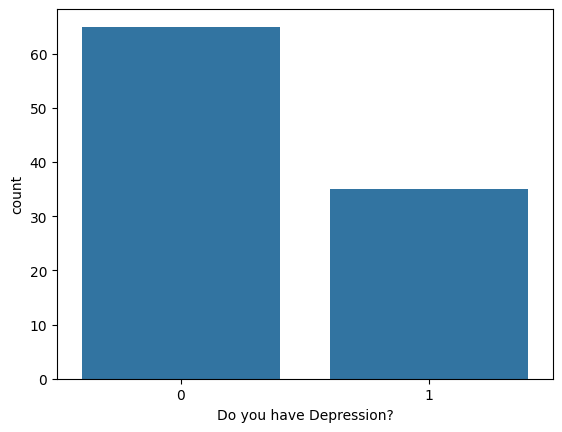

In [663]:
sns.countplot(x='Do you have Depression?', data=df)

In [664]:
df['Do you have Depression?'].value_counts()

Do you have Depression?
0    65
1    35
Name: count, dtype: int64

<Axes: xlabel='What is your CGPA?', ylabel='count'>

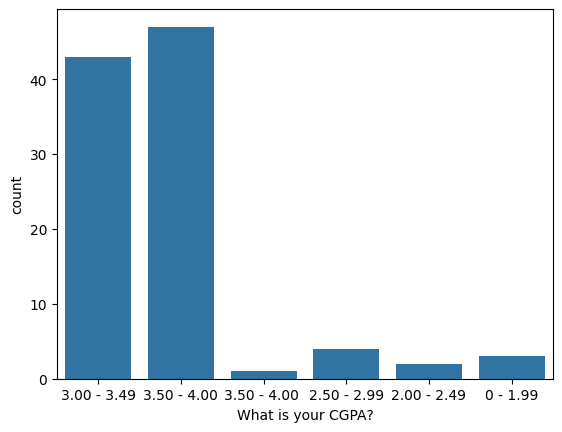

In [665]:
sns.countplot(x='What is your CGPA?', data=df)

In [666]:
df['What is your CGPA?'].value_counts()

What is your CGPA?
3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         3
2.00 - 2.49      2
3.50 - 4.00      1
Name: count, dtype: int64

In [667]:
df.columns

Index(['Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [668]:
df.corr(numeric_only=True)

,Age,Your current year of Study,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
Age,1.000000,0.244315,0.104551,-0.072171,-0.093661,0.055741,0.047808
Your current year of Study,0.244315,1.000000,0.229297,-0.027538,-0.028154,-0.028793,-0.079982
Marital status,0.104551,0.229297,1.000000,0.594762,0.089828,0.273809,0.349168
Do you have Depression?,-0.072171,-0.027538,0.594762,1.000000,0.269978,0.243003,0.344298
Do you have Anxiety?,-0.093661,-0.028154,0.089828,0.269978,1.000000,0.079912,0.085334
Do you have Panic attack?,0.055741,-0.028793,0.273809,0.243003,0.079912,1.000000,0.180891
Did you seek any specialist for a treatment?,0.047808,-0.079982,0.349168,0.344298,0.085334,0.180891,1.000000


<Axes: >

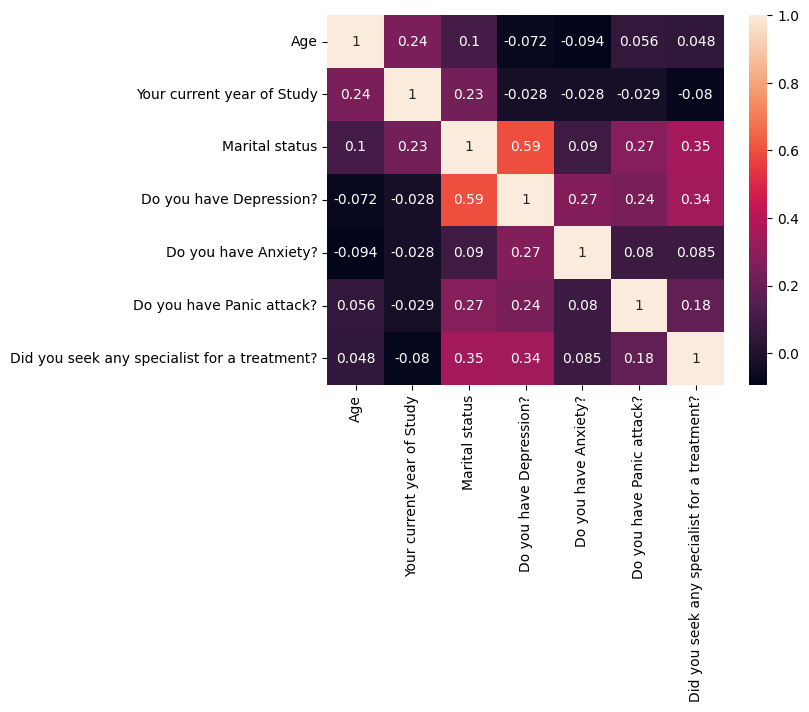

In [669]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='Age', ylabel='What is your CGPA?'>

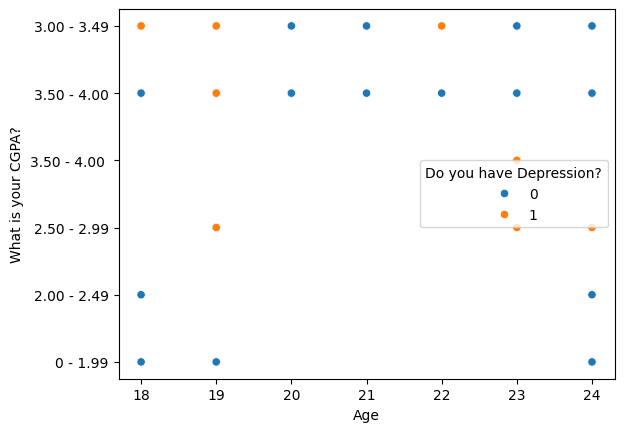

In [670]:
sns.scatterplot(x='Age', y='What is your CGPA?', data=df, hue='Do you have Depression?')

<Axes: xlabel='Do you have Depression?', ylabel='What is your CGPA?'>

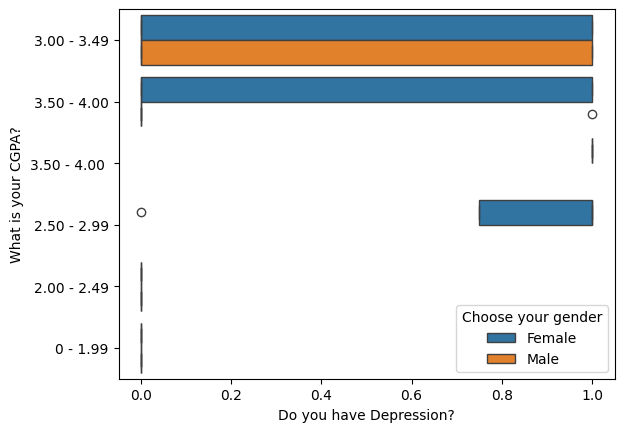

In [671]:

sns.boxplot(
    data=df,
    x='Do you have Depression?',
    y='What is your CGPA?',
    hue='Choose your gender'
)

In [672]:
# Decision Tree bir sınıflandırda algoritması olduğundan dolayı matrix oluşturalım

X = pd.get_dummies(df.drop('Do you have Depression?', axis=1), drop_first=True)

y = df['Do you have Depression?']

In [673]:
X[:5]

,Age,Your current year of Study,Marital status,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Choose your gender_Male,What is your course?_Accounting,What is your course?_BCS,What is your course?_BENL,...,What is your course?_TAASL,What is your course?_Usuluddin,What is your course?_engin,What is your course?_koe,What is your course?_psychology,What is your CGPA?_2.00 - 2.49,What is your CGPA?_2.50 - 2.99,What is your CGPA?_3.00 - 3.49,What is your CGPA?_3.50 - 4.00,What is your CGPA?_3.50 - 4.00
0,18,1,0,0,1,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,21,2,0,1,0,0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,19,1,0,1,1,0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,22,3,1,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,23,4,0,0,0,0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [674]:
y[:5]

0    1
1    0
2    1
3    1
4    0
Name: Do you have Depression?, dtype: int64

## Train Test Split

In [675]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

## Karar Verme Ağacı Modeli

In [676]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,  random_state=42)


In [677]:
decision_tree.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


C:\Users\Bugra\AppData\Local\Temp\ipykernel_25892\75611153.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


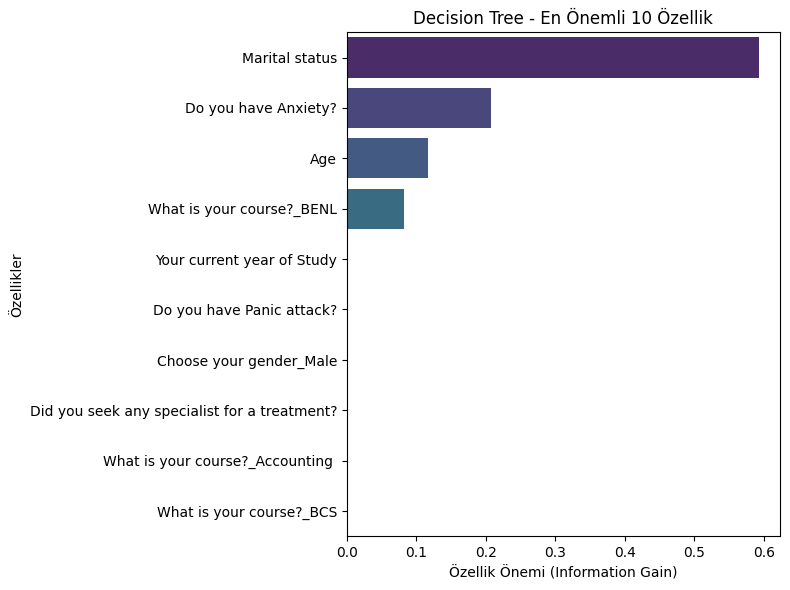

In [678]:
# Özellik önemlerini al
feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': decision_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)



plt.figure(figsize=(8,6))
sns.barplot(
    data=feat_importance.head(10),   # en önemli 10 özellik
    x='Importance', 
    y='Feature', 
    palette='viridis'
)
plt.title('Decision Tree - En Önemli 10 Özellik')
plt.xlabel('Özellik Önemi (Information Gain)')
plt.ylabel('Özellikler')
plt.tight_layout()
plt.show()

In [679]:
# Detect Maximum Depth

from sklearn.model_selection import GridSearchCV

GridSearch = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={
        'max_depth': range(1, decision_tree.tree_.max_depth + 1, 2),
        'max_features': range(1, len(decision_tree.feature_importances_)+1)        
    },
    scoring='accuracy',
    n_jobs=-1
)

GridSearch = GridSearch.fit(X_train, y_train)

print(f'Bulunan Node Sayısı: {GridSearch.best_estimator_.tree_.node_count}\n'
      f'Maksimum Derinlik: {GridSearch.best_estimator_.tree_.max_depth}')



Bulunan Node Sayısı: 9
Maksimum Derinlik: 3


In [680]:
decision_tree.tree_.node_count, decision_tree.tree_.max_depth

(9, 3)

## Değerlendirme

In [681]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [682]:
depression_pred = decision_tree.predict(X_test)

In [683]:
confusion_matrix(y_test, depression_pred)

array([[11,  4],
       [ 3,  2]])

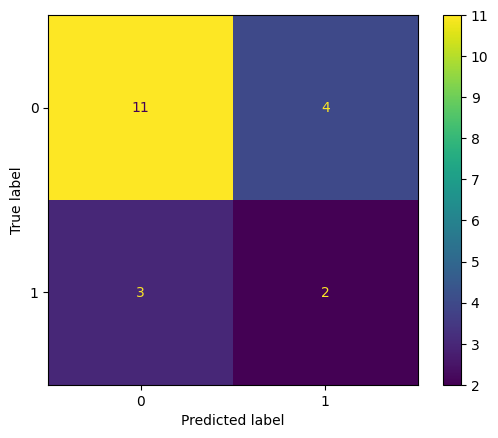

In [684]:
ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test)

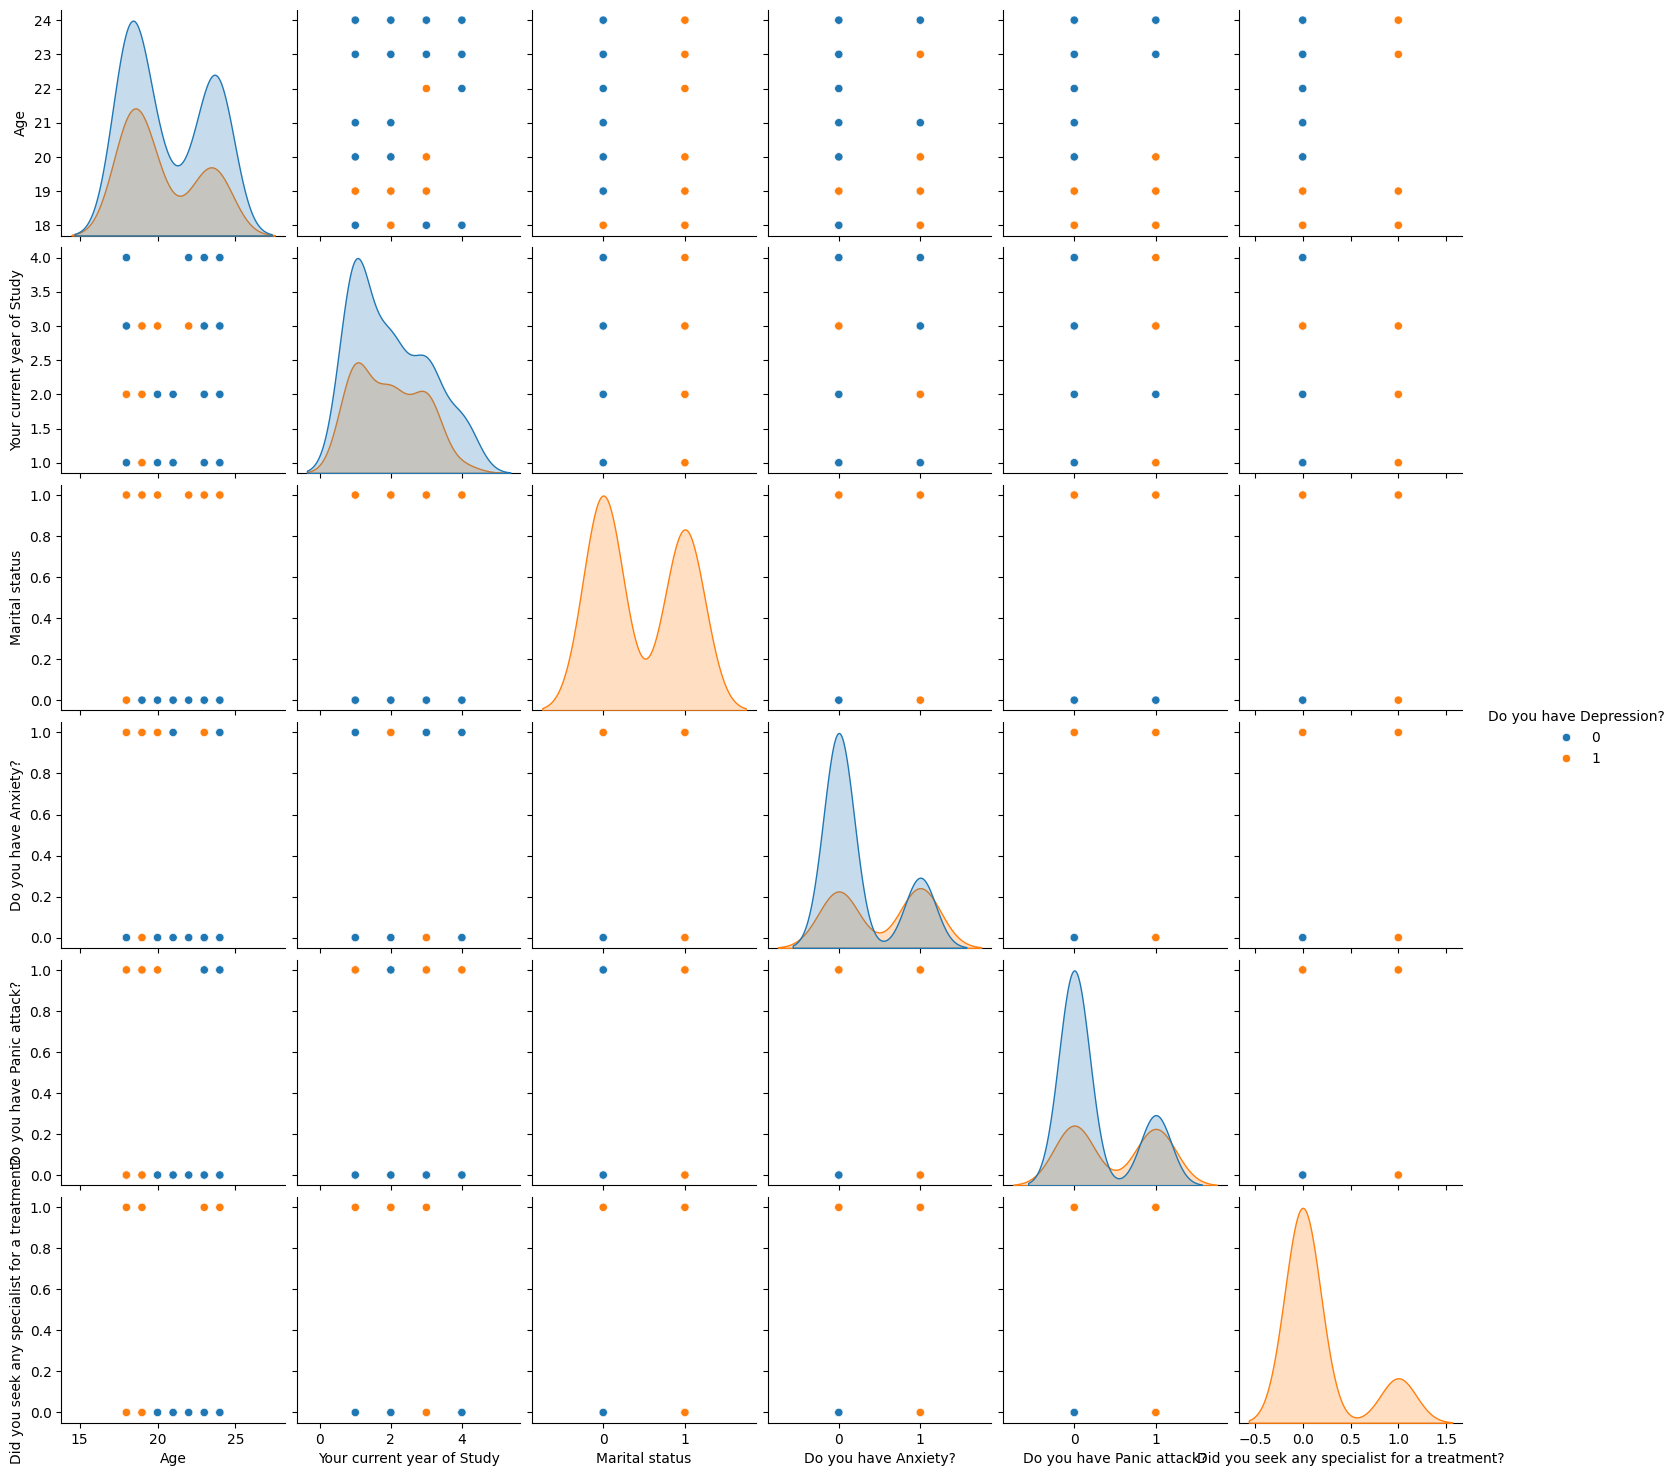

In [685]:
sns.pairplot(data=df, hue='Do you have Depression?')

In [686]:
print(classification_report(y_test, depression_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.33      0.40      0.36         5

    accuracy                           0.65        20
   macro avg       0.56      0.57      0.56        20
weighted avg       0.67      0.65      0.66        20



In [687]:
def measure_errors(y_true, y_pred, dataset_name) ->pd.DataFrame:
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

    return pd.DataFrame(
        {
            dataset_name: [acc, precision, recall, f1]
        },
        index=['Accuracy', 'Precision', 'Recall', 'F1 Score']
    )


y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

train_test_full_error_df = pd.concat(
    [
        measure_errors(y_train, y_train_pred, 'train'),
        measure_errors(y_test, y_test_pred, 'test')
    ],
    axis = 1
)

train_test_full_error_df

,train,test
Accuracy,0.862500,0.650000
Precision,0.851386,0.559524
Recall,0.863333,0.566667
F1 Score,0.855997,0.561129


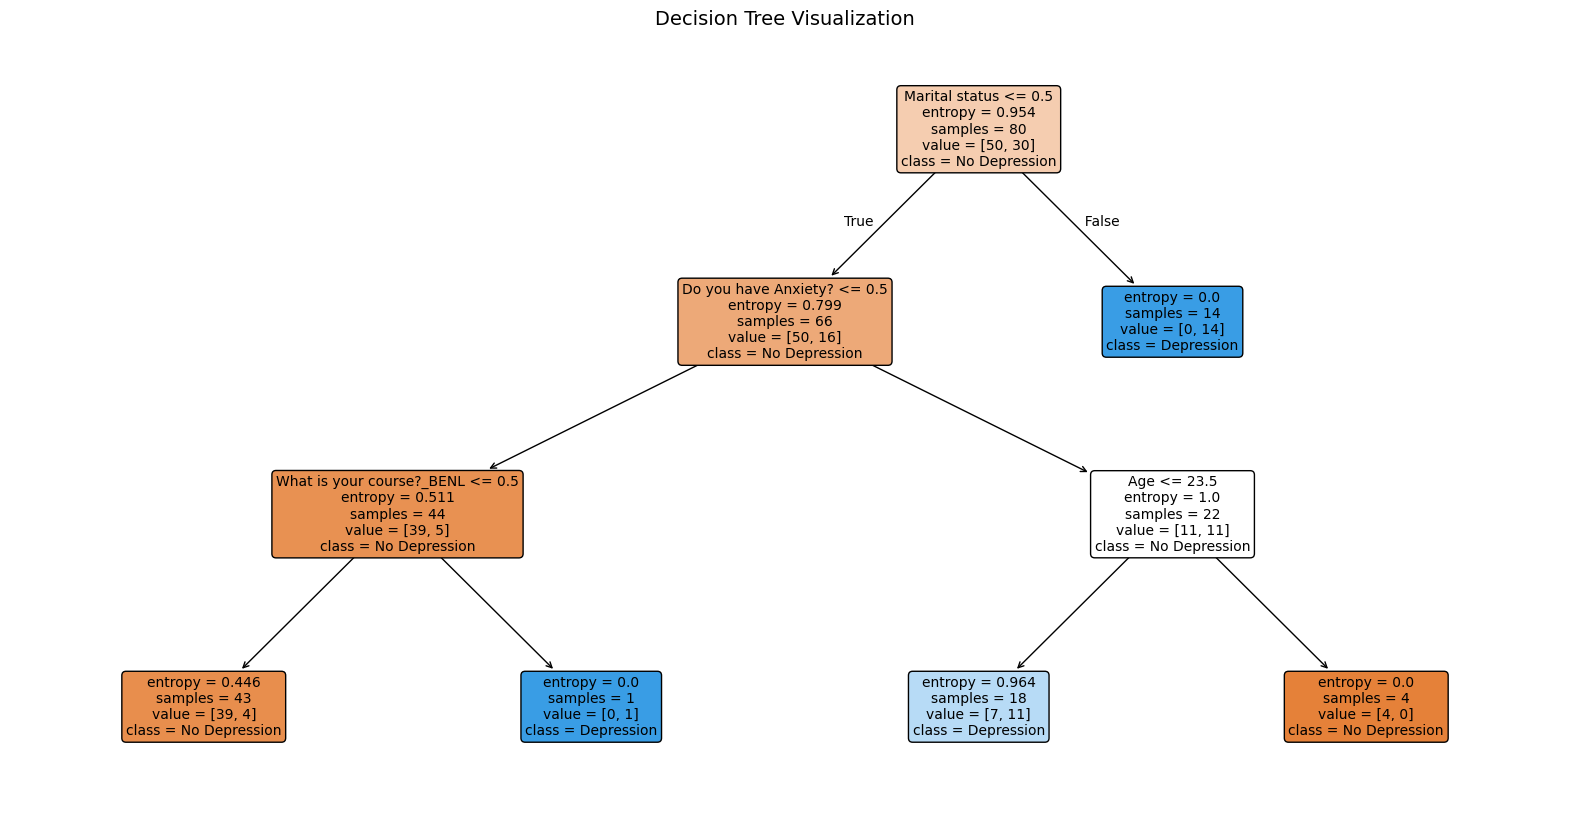

In [688]:
from sklearn.tree import plot_tree


plt.figure(figsize=(20,10))  # Daha geniş bir görsel
plot_tree(
    decision_tree,
    feature_names=X_train.columns,   # Özellik isimlerini göster
    class_names=['No Depression', 'Depression'],  # Sınıf isimleri
    filled=True,                     # Renklerle ayır
    rounded=True,                    # Köşeleri yuvarla
    fontsize=10                      # Font boyutu
)


plt.title("Decision Tree Visualization", fontsize=14)
plt.show()